In [2]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split
%matplotlib inline 
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_selection import chi2
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Activation
# from keras.utils import np_utils
import re
from keras.preprocessing import sequence
from keras.preprocessing.text import text_to_word_sequence
from keras.preprocessing.text import one_hot
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier

In [3]:
names=['URL','Category']
df=pd.read_csv('URL Classification.csv',names=names, na_filter=False)
dataset = df[:]

In [4]:
adult = dataset[1:2000]
arts = dataset[50000:52000]
business = dataset[520000:522000]
computers = dataset[535300:537300]
games = dataset[650000:652000]
health = dataset[710000:712000]
home =  dataset[764200:766200]
kids =  dataset[793080:795080]
news =  dataset[839730:841730]
recreation =  dataset[850000:852000]
reference =  dataset[955250:957250]
science =  dataset[1013000:1015000]
shopping =  dataset[1143000:1145000]
society =  dataset[1293000:1295000]
sports =  dataset[1492000:1494000]

test_data = pd.concat([adult, arts, business, computers, games, health, home, 
              kids, news, recreation, reference,science, shopping, society, sports], axis=0)

dataset.drop(dataset.index[1:2000],inplace= True)
dataset.drop(dataset.index[50000:52000],inplace= True)
dataset.drop(dataset.index[520000:522000],inplace= True)
dataset.drop(dataset.index[535300:537300],inplace= True)
dataset.drop(dataset.index[650000:652000],inplace= True)
dataset.drop(dataset.index[710000:712000],inplace= True)
dataset.drop(dataset.index[764200:766200],inplace= True)
dataset.drop(dataset.index[793080:795080],inplace= True)
dataset.drop(dataset.index[839730:841730],inplace= True)
dataset.drop(dataset.index[850000:852000],inplace= True)
dataset.drop(dataset.index[955250:957250],inplace= True)
dataset.drop(dataset.index[1013000:1015000],inplace= True)
dataset.drop(dataset.index[1143000:1145000],inplace= True)
dataset.drop(dataset.index[1293000:1295000],inplace= True)
dataset.drop(dataset.index[1492000:1494000],inplace= True)
dataset.tail()

C:\Users\tmachine\AppData\Local\Temp\ipykernel_7676\3423605945.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.drop(dataset.index[1:2000],inplace= True)
C:\Users\tmachine\AppData\Local\Temp\ipykernel_7676\3423605945.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.drop(dataset.index[50000:52000],inplace= True)
C:\Users\tmachine\AppData\Local\Temp\ipykernel_7676\3423605945.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ve

,URL,Category
1048572,https://www.nucleics.com/peaktrace/,Science
1048573,http://www.phenosystems.com,Science
1048574,http://www.thebiolog.com,Science
1048575,http://code.google.com/p/openbiomind/,Science
1048576,http://va-genex.sourceforge.net/,Science


Text(0, 0.5, 'Total Number Of Individual Category')

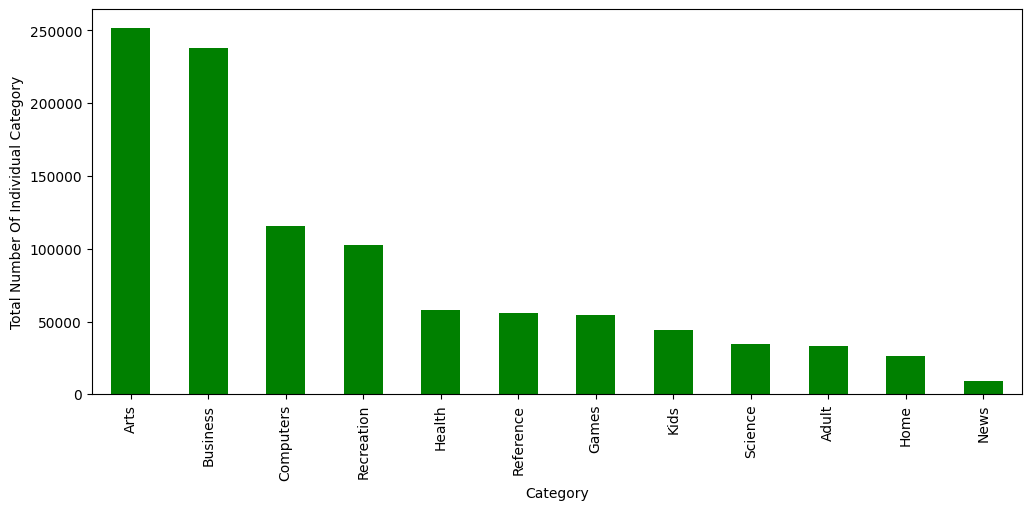

In [5]:
dataset.Category.value_counts().plot(figsize=(12,5),kind='bar',color='green');
plt.xlabel('Category')
plt.ylabel('Total Number Of Individual Category')

,URL,Category
1,http://www.liquidgeneration.com/,Adult
2,http://www.onlineanime.org/,Adult


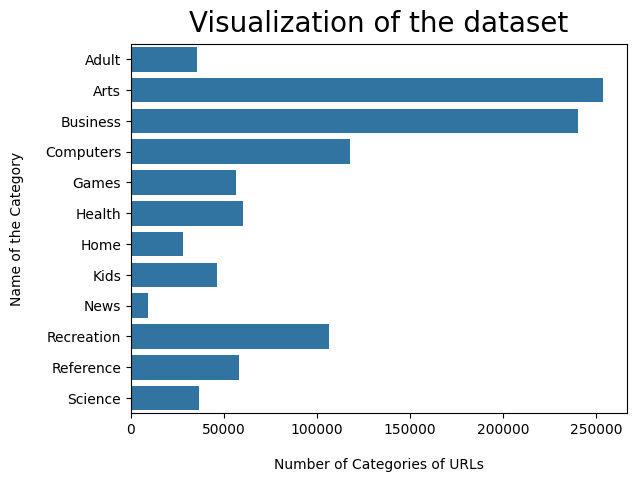

In [6]:
import seaborn as sns
ax = sns.countplot(y="Category",  data=df )
plt.title("Visualization of the dataset", y=1.01, fontsize=20)
plt.ylabel("Name of the Category", labelpad=15)
plt.xlabel("Number of Categories of URLs", labelpad=15)
df[:2]

Text(0.5, 0, 'Number of Categories of URLs')

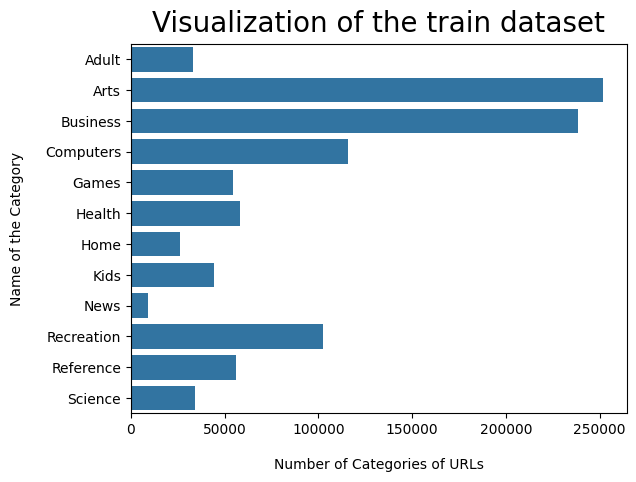

In [7]:
ax = sns.countplot(y = "Category",  data = dataset )
plt.title("Visualization of the train dataset", y=1.01, fontsize=20)
plt.ylabel("Name of the Category", labelpad=15)
plt.xlabel("Number of Categories of URLs", labelpad=15)

Text(0, 0.5, 'Total Number Of Individual Category')

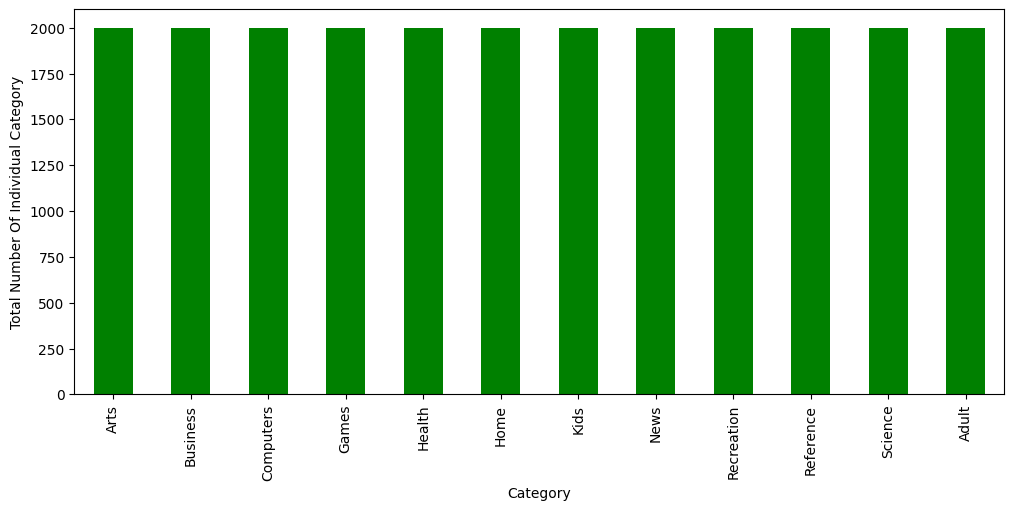

In [8]:
test_data.Category.value_counts().plot(figsize=(12,5),kind='bar',color='green');
plt.xlabel('Category')
plt.ylabel('Total Number Of Individual Category')

Text(0.5, 0, 'Number of Categories of URLs')

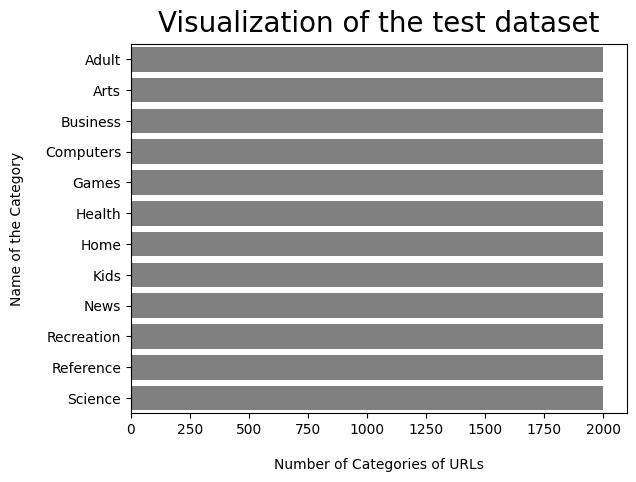

In [9]:
ax = sns.countplot(y = "Category",  data = test_data , color = 'gray')
plt.title("Visualization of the test dataset", y=1.01, fontsize=20)
plt.ylabel("Name of the Category", labelpad=15)
plt.xlabel("Number of Categories of URLs", labelpad=15)

In [10]:
X_train=dataset['URL']
y_train=dataset['Category']
#print(X_train)
X_train.shape

(1024577,)

In [11]:
X_test=test_data['URL']
y_test=test_data['Category']
#print(X_test)
X_test.shape

(23999,)

In [12]:
import re
from sklearn.pipeline import Pipeline
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english", ignore_stopwords=True)
class StemmedCountVectorizer(CountVectorizer):
    def build_analyzer(self):
        analyzer = super(StemmedCountVectorizer, self).build_analyzer()
        return lambda doc: ([stemmer.stem(w) for w in analyzer(doc)])
stemmed_count_vect = StemmedCountVectorizer(stop_words='english', ngram_range=(3,3))

#count_vect = CountVectorizer(stop_words='english', ngram_range=(1,1))
gs_clf = Pipeline([('vect', stemmed_count_vect),
                   ('tfidf', TfidfTransformer()),
                   ('clf', SGDClassifier(loss='perceptron', penalty='l2',
                    alpha =1e-4 , max_iter=20 ,tol=None)),
   ])
gs_clf = gs_clf.fit(X_train, y_train)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tmachine\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix
#grid_mean_scores = [result.mean_validation_score for result in gs_clf.grid_scores_]
#print(grid_mean_scores)
y_pred=gs_clf.predict(X_test)
precision_recall_fscore_support(y_test, y_pred, average='weighted')

(0.9292862181659304, 0.9231217967415309, 0.9213284869161218, None)

In [14]:
y_pred=gs_clf.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, digits = 4))

              precision    recall  f1-score   support

       Adult     0.8175    0.5848    0.6818      1999
        Arts     0.7055    0.9655    0.8153      2000
    Business     0.9531    0.9965    0.9743      2000
   Computers     0.9834    0.9760    0.9797      2000
       Games     0.9798    0.9920    0.9858      2000
      Health     0.9435    0.9940    0.9681      2000
        Home     0.9785    0.9775    0.9780      2000
        Kids     0.9650    0.8000    0.8748      2000
        News     0.9959    0.8430    0.9131      2000
  Recreation     0.9808    0.9940    0.9873      2000
   Reference     0.8616    0.9775    0.9159      2000
     Science     0.9869    0.9765    0.9817      2000

    accuracy                         0.9231     23999
   macro avg     0.9293    0.9231    0.9213     23999
weighted avg     0.9293    0.9231    0.9213     23999



In [16]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
array = confusion_matrix(y_test, y_pred)
cm=np.array(array)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
df_cm = pd.DataFrame(cm, index = [i for i in "0123456789ABCDE"],
                columns = [i for i in "0123456789ABCDE"])
plt.figure(figsize = (20,15))
sn.heatmap(df_cm, annot=True)

ValueError: Shape of passed values is (12, 12), indices imply (15, 15)

C:\Users\tmachine\AppData\Local\Temp\ipykernel_7676\2331353874.py:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)


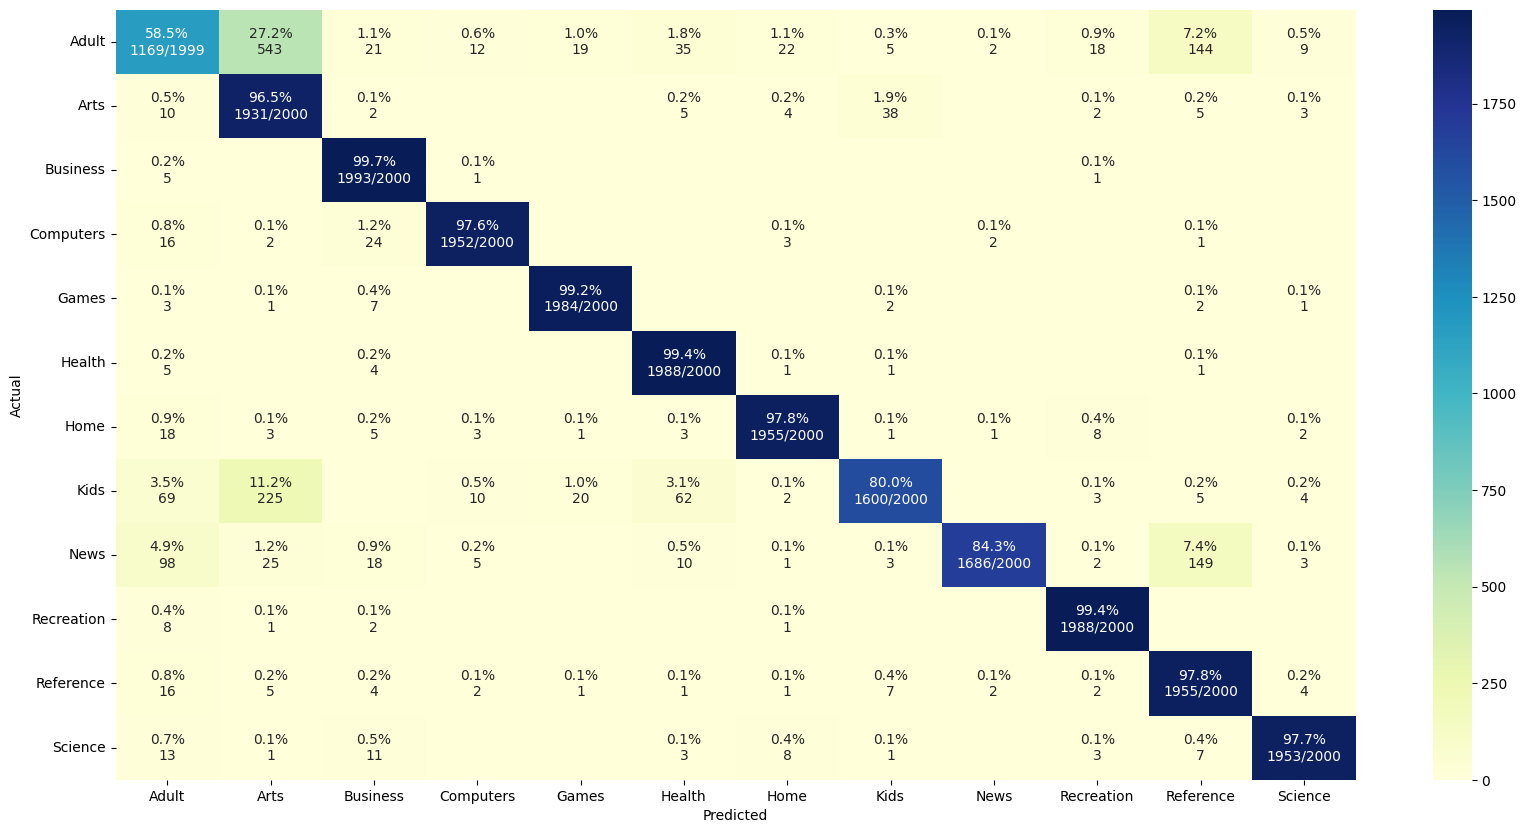

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_cm(y_true, y_pred, figsize=(20,10)):
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_true), columns=np.unique(y_true))
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, cmap= "YlGnBu", annot=annot, fmt='', ax=ax)

plot_cm(y_test, y_pred)

In [18]:
print('Naive Bayes Train Accuracy = ',metrics.accuracy_score(y_train,gs_clf.predict(X_train)))
print('Naive Bayes Test Accuracy = ',metrics.accuracy_score(y_test,gs_clf.predict(X_test)))

Naive Bayes Train Accuracy =  0.9794500559743191
Naive Bayes Test Accuracy =  0.9231217967415309


In [24]:
print(gs_clf.predict(['http://www.businesstoday.net/']))
print(gs_clf.predict(['http://www.gamespot.net/']))
print(gs_clf.predict(['http://www.excelsports.net']))
print(gs_clf.predict(['http://www.eresgay.com/pierced&amp;tattooedmales/']))

['Business']
['Games']
['Recreation']
['Adult']


In [20]:
import tensorflow as tf
import pickle

# save the model to disk
filename = 'svm_stem(3,3).sav'
pickle.dump(gs_clf, open(filename, 'wb'))
 
# some time later...
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
result

0.9231217967415309